In [61]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import wave
import struct

In [35]:
def resample_audio_file(audio_file, sample_rate=8000):
    original_sample_rate, audio_data = wavfile.read(audio_file)
    sample_size = original_sample_rate // sample_rate
    
    num_samples = len(audio_data) // sample_size
    audio_samples = np.split(audio_data[:num_samples * sample_size], num_samples)
    
    frequency_values = []
    for sample in audio_samples:
        frequency_values.append(np.mean(sample))
    
    return np.array(frequency_values)

In [12]:
original_size = wavfile.read("speech.wav")[1].shape[0]
original_size

/tmp/ipykernel_47078/1458920143.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  original_size = wavfile.read("speech.wav")[1].shape[0]


113280

In [36]:
output = resample_audio_file("speech.wav")

/tmp/ipykernel_47078/2618749735.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  original_sample_rate, audio_data = wavfile.read(audio_file)


/tmp/ipykernel_47078/742238405.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  original_samples = wavfile.read("speech.wav")[1]


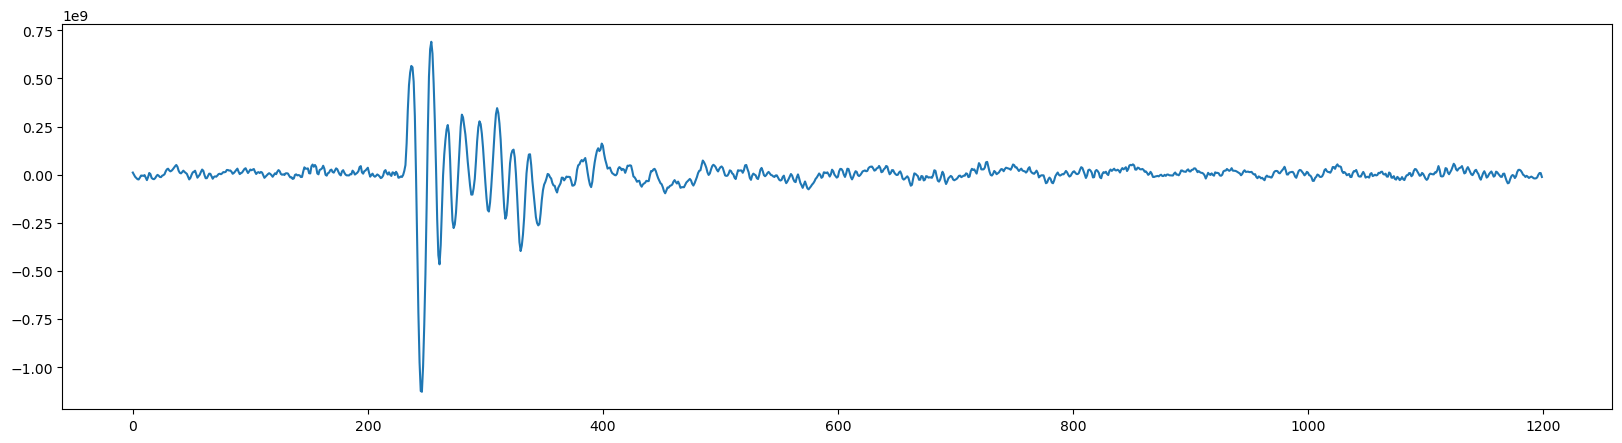

In [30]:
original_samples = wavfile.read("speech.wav")[1]
plt.figure(figsize=(20,5))
plt.plot(original_samples[:200*(48000//8000)])
plt.show()

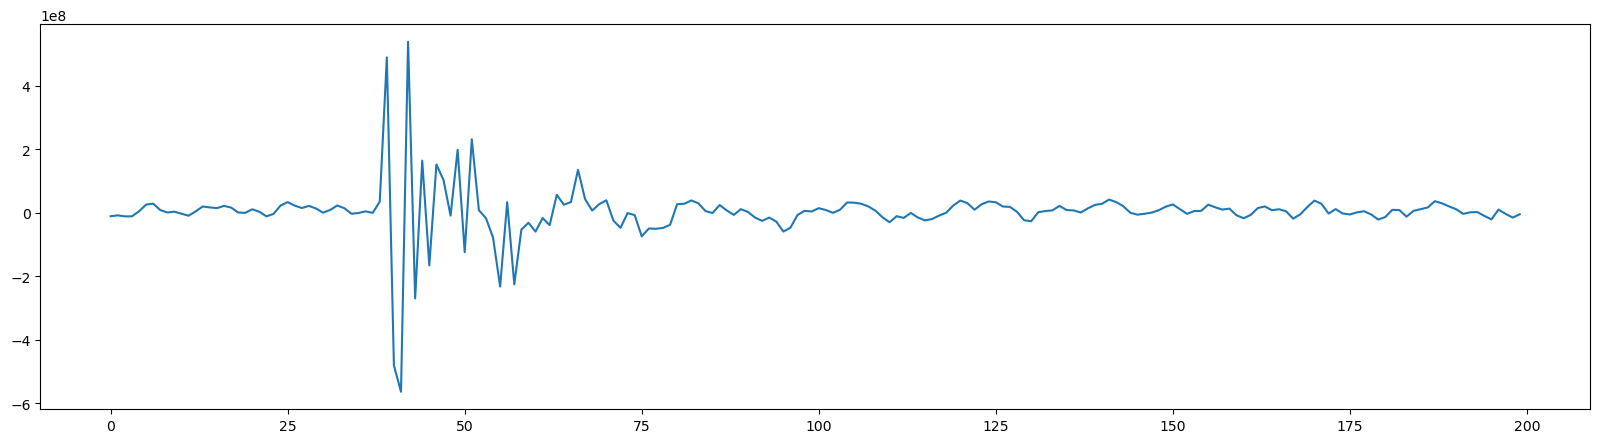

In [37]:
plt.figure(figsize=(20,5))
plt.plot(output[:200])
plt.show()

In [49]:
wavfile.write('output.wav', 8000, output/1_000_000_000)

In [50]:
(output/1_000_000_000).mean()

-0.0001442411028248583

In [73]:
def convert_to_pcm(input_wav, output_pcm):
    with wave.open(input_wav, 'rb') as wav_file:
        frames = wav_file.readframes(wav_file.getnframes())

        with open(output_pcm, 'wb') as pcm_file:
            pcm_file.write(frames)

In [82]:
convert_to_pcm("output.wav", "ttstest.pcm")

Error: unknown format: 3

In [71]:
def generate_pwm(audio_file, output_pin):
    with wave.open(audio_file, 'rb') as wav_file:
        frames = wav_file.readframes(wav_file.getnframes())
        audio_samples = np.frombuffer(frames, dtype=np.int16)

        normalized_samples = audio_samples / np.max(np.abs(audio_samples))

        pwm_values = np.interp(normalized_samples, (-1, 1), (0, 255))

        for pwm_value in pwm_values:
            print(f"Outputting PWM value: {int(pwm_value)} to pin {output_pin}")